# Combined labels for both cells and nuclei for lung_s3
# Version with late fusion PCA

In [1]:
slide_id = "lung_s3"

In [2]:
import pandas as pd
import scanpy as sc
import spatialdata as sd
import numpy as np
import anndata as ad
from spatialdata.models import get_table_keys
from matplotlib.colors import to_rgba
from functools import partial
from matplotlib import colors
import gc

## 1. Load the data

In [3]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables',))

cellid2transcript_cat = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'transcript_cat']].values)

cellid2nucleilabel = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'final_label']].values)
cellid2celllabel = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'final_label']].values)

cellid2nucleilabel1 = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'label1']].values)
cellid2celllabel1 = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'label1']].values)

del sdata_final
gc.collect()

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


1546

In [4]:
sdata_processed = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_{slide_id}.zarr", selection=('tables',))
sdata_processed

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


SpatialData object, with associated Zarr store: /Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_lung_s3.zarr
└── Tables
      ├── 'table_cells': AnnData (275207, 5001)
      └── 'table_nuclei': AnnData (275207, 8584)
with coordinate systems:

with the following elements in the Zarr store but not in the SpatialData object:
    ▸ morpho (Images)
    ▸ st (Points)
    ▸ nucleus_boundaries (Shapes)
    ▸ he (Images)
    ▸ cell_boundaries (Shapes)

In [5]:
adata_nuclei_ini = sdata_processed.tables['table_nuclei'].copy()
adata_nuclei_ini

AnnData object with n_obs × n_vars = 275207 × 8584
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram'
    uns: 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'spatial', 'tangram_pred'

In [6]:
adata_nuclei_ini.var

""
A2ML1
AAMP
AAR2
AARSD1
ABAT
...
ZSCAN26
ZSWIM6
ZUP1
ZYG11B


In [7]:
adata_cells_ini = sdata_processed.tables['table_cells'].copy()
adata_cells_ini

AnnData object with n_obs × n_vars = 275207 × 5001
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [8]:
adata_cells_ini.var

,gene_ids,feature_types,genome
A2ML1,ENSG00000166535,Gene Expression,Unknown
AAMP,ENSG00000127837,Gene Expression,Unknown
AAR2,ENSG00000131043,Gene Expression,Unknown
AARSD1,ENSG00000266967,Gene Expression,Unknown
ABAT,ENSG00000183044,Gene Expression,Unknown
...,...,...,...
ZSCAN26,ENSG00000197062,Gene Expression,Unknown
ZSWIM6,ENSG00000130449,Gene Expression,Unknown
ZUP1,ENSG00000153975,Gene Expression,Unknown
ZYG11B,ENSG00000162378,Gene Expression,Unknown


In [9]:
# Clean memory
del sdata_processed
gc.collect()

176

## 2. Get adata_nuclei and adata_cyto

In [10]:
adata_cells_ini = adata_cells_ini[adata_cells_ini.obs["transcript_counts"]>10].copy()  # Filter cells with less than 10 transcripts
len(adata_cells_ini.obs)

272264

In [11]:
# Align the cell_id in both AnnData objects
# Create a mapping of cell_id to index position in both objects
nuclei_idx = adata_nuclei_ini.obs.set_index('cell_id').index
cells_idx = adata_cells_ini.obs.set_index('cell_id').index

# Find the intersection of cell_id in both datasets
common_cells = nuclei_idx.intersection(cells_idx)
print(f"Number of common cell_ids: {len(common_cells)}")

# Subset both AnnData objects to include only common cell_ids
adata_nuclei = adata_nuclei_ini[adata_nuclei_ini.obs['cell_id'].isin(common_cells)]
adata_cells = adata_cells_ini[adata_cells_ini.obs['cell_id'].isin(common_cells)]

# Merge the 'obs' dataframes based on 'cell_id' to ensure the same order in both
obs_nuclei = adata_nuclei.obs[['cell_id']].reset_index(drop=True)
obs_cells = adata_cells.obs[['cell_id']].reset_index(drop=True)

# Ensure that both are in the same order
adata_nuclei = adata_nuclei[obs_nuclei['cell_id'].argsort().values]
adata_cells = adata_cells[obs_cells['cell_id'].argsort().values]

# Check that the cell_ids match now
assert np.array_equal(adata_nuclei.obs['cell_id'].values, adata_cells.obs['cell_id'].values), "Cell IDs do not match after alignment."

# Find common genes
common_genes = adata_nuclei.var_names.intersection(adata_cells.var_names)
print(f"Number of common genes: {len(common_genes)}")

# Subset both AnnData objects to include only the common genes
adata_nuclei = adata_nuclei[:, common_genes]
adata_cells = adata_cells[:, common_genes]

# Remove nucleus RNA from cell RNA to get the cytoplasmic RNA
X_cyto = adata_cells.X - adata_nuclei.X

# Because of slight mismatches or rounding, some entries might go negative by 1 or 2 in real data. So we clip to 0:
X_cyto.data = np.clip(X_cyto.data, a_min=0, a_max=None)

# Create a new AnnData object with the cytoplasmic RNA
adata_cyto = ad.AnnData(
    X=X_cyto,
    obs=adata_cells.obs.copy(),  # or adata_nuclei.obs, they should be the same set
    var=adata_cells.var.copy()   # same genes as well
)

Number of common cell_ids: 272264
Number of common genes: 4999


In [12]:
adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)
adata_nuclei.obs

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_42906/547616959.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)


,region,slide,cell_id,area,ct_tangram,transcript_counts
aaaaaaaa-1,nucleus_boundaries,morpho,aaaaaaaa-1,19.574901,Club cell,131
aaaaaaab-1,nucleus_boundaries,morpho,aaaaaaab-1,8.737764,Neuroendocrine cell,41
aaaaaaac-1,nucleus_boundaries,morpho,aaaaaaac-1,24.090059,CD16 NK cell,210
aaaaaaad-1,nucleus_boundaries,morpho,aaaaaaad-1,19.079021,Memory CD4 T cell,183
aaaaaaae-1,nucleus_boundaries,morpho,aaaaaaae-1,25.423266,CD16 NK cell,244
...,...,...,...,...,...,...
aaaeddab-1,nucleus_boundaries,morpho,aaaeddab-1,3.883578,CD16 monocyte,5
aaaeddac-1,nucleus_boundaries,morpho,aaaeddac-1,38.586490,Goblet cell,81
aaaeddad-1,nucleus_boundaries,morpho,aaaeddad-1,24.609702,Neuroendocrine cell,9
aaaeddae-1,nucleus_boundaries,morpho,aaaeddae-1,25.874608,Red blood cell,75


In [13]:
adata_cyto.obs["transcript_counts"] = adata_cyto.X.sum(axis=1).astype(int)
adata_cyto.obs

,cell_id,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method,region,z_level
0,aaaaaaaa-1,128,0,0,0,0,0,226,44.659533,21.223438,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
1,aaaaaaab-1,71,0,0,0,0,0,108,32.196407,9.889219,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
2,aaaaaaac-1,77,0,0,0,0,3,268,47.504377,25.739063,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
3,aaaaaaad-1,165,0,0,0,0,1,329,37.253908,20.636407,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
4,aaaaaaae-1,115,0,0,0,0,0,337,52.155471,27.274376,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278322,aaaeddab-1,113,0,0,0,0,0,118,96.634379,4.605938,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0
278323,aaaeddac-1,1,0,0,0,0,0,76,41.001876,41.001876,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,7.0
278324,aaaeddad-1,4,0,0,0,0,0,12,26.416407,26.416407,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0
278325,aaaeddae-1,8,0,0,0,0,1,74,37.976408,27.545313,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0


In [14]:
adata_cells_ini.obs

,cell_id,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method,region,z_level
0,aaaaaaaa-1,226,0,0,0,0,0,226,44.659533,21.223438,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
1,aaaaaaab-1,108,0,0,0,0,0,108,32.196407,9.889219,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
2,aaaaaaac-1,265,0,0,0,0,3,268,47.504377,25.739063,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
3,aaaaaaad-1,328,0,0,0,0,1,329,37.253908,20.636407,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
4,aaaaaaae-1,337,0,0,0,0,0,337,52.155471,27.274376,1.0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,cell_labels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278322,aaaeddab-1,118,0,0,0,0,0,118,96.634379,4.605938,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0
278323,aaaeddac-1,76,0,0,0,0,0,76,41.001876,41.001876,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,7.0
278324,aaaeddad-1,12,0,0,0,0,0,12,26.416407,26.416407,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0
278325,aaaeddae-1,73,0,0,0,0,1,74,37.976408,27.545313,1.0,Segmented by nucleus expansion of 5.0µm,cell_labels,6.0


In [15]:
adata_nuclei.var

""
A2ML1
AAMP
AAR2
AARSD1
ABAT
...
ZSCAN26
ZSWIM6
ZUP1
ZYG11B


In [16]:
adata_cyto.var

,gene_ids,feature_types,genome
A2ML1,ENSG00000166535,Gene Expression,Unknown
AAMP,ENSG00000127837,Gene Expression,Unknown
AAR2,ENSG00000131043,Gene Expression,Unknown
AARSD1,ENSG00000266967,Gene Expression,Unknown
ABAT,ENSG00000183044,Gene Expression,Unknown
...,...,...,...
ZSCAN26,ENSG00000197062,Gene Expression,Unknown
ZSWIM6,ENSG00000130449,Gene Expression,Unknown
ZUP1,ENSG00000153975,Gene Expression,Unknown
ZYG11B,ENSG00000162378,Gene Expression,Unknown


In [17]:
# Temporary saving adata_nuclei, adata_nuclei_ini, adata_cyto and adata_cells
adata_nuclei.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")
adata_nuclei_ini.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")
adata_cyto.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")
adata_cells.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [18]:
# Clean memory
del adata_nuclei_ini, adata_cyto, adata_cells, adata_cells_ini
gc.collect()

326

## 3. Separated PCA

##### Nuclei :

In [19]:
#adata_nuclei = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")

In [20]:
# Preprocess the data
sc.pp.normalize_total(adata_nuclei, target_sum=1e4)
sc.pp.log1p(adata_nuclei)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [21]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_nuclei, max_value=10)

In [22]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_nuclei, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


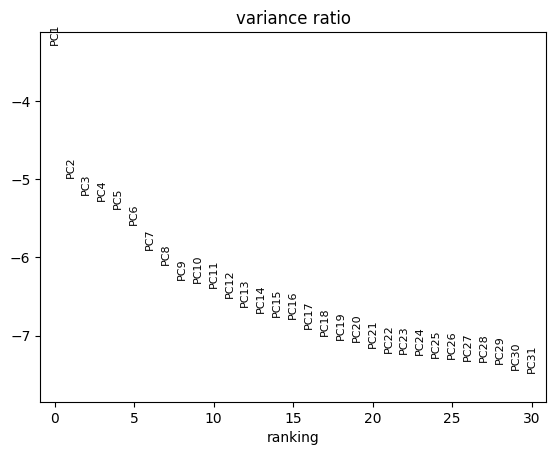

In [23]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_nuclei, log=True)

In [24]:
adata_nuclei

AnnData object with n_obs × n_vars = 272264 × 4999
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts'
    var: 'mean', 'std'
    uns: 'sopa_attrs', 'spatialdata_attrs', 'log1p', 'pca'
    obsm: 'spatial', 'tangram_pred', 'X_pca'
    varm: 'PCs'

In [25]:
# Group the PCs into a single AnnData object
X_nuc_pca = adata_nuclei.obsm["X_pca"][:, :21]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_nuc_pca /= np.sqrt(np.max(adata_nuclei.uns["pca"]["variance"]))

# Save obs
nuclei_obs_all = adata_nuclei.obs.copy()

In [26]:
# Check var of first PC for each table is 1
print(np.var(adata_nuclei.obsm["X_pca"][:, 0]))

0.9999963


In [27]:
# Have a look to all the PCs var in the combined data
print("Nuc:")
for i in range(21):
    print(f"PC {i} variance: {np.var(adata_nuclei.obsm['X_pca'][:, i])}")

Nuc:
PC 0 variance: 0.9999963045120239
PC 1 variance: 0.183858260512352
PC 2 variance: 0.14754937589168549
PC 3 variance: 0.1370697021484375
PC 4 variance: 0.1237880289554596
PC 5 variance: 0.09984663873910904
PC 6 variance: 0.0724528580904007
PC 7 variance: 0.060275834053754807
PC 8 variance: 0.04990452155470848
PC 9 variance: 0.0476151779294014
PC 10 variance: 0.04459225386381149
PC 11 variance: 0.03922242298722267
PC 12 variance: 0.03511672839522362
PC 13 variance: 0.03250110149383545
PC 14 variance: 0.030835187062621117
PC 15 variance: 0.03016386739909649
PC 16 variance: 0.02639530971646309
PC 17 variance: 0.024255353957414627
PC 18 variance: 0.023098500445485115
PC 19 variance: 0.022498808801174164
PC 20 variance: 0.020743632689118385


In [28]:
# Clean memory
del adata_nuclei
gc.collect()

5083

##### Cyto :

In [29]:
adata_cyto = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")

In [30]:
# Preprocess the data
sc.pp.normalize_total(adata_cyto, target_sum=1e4)
sc.pp.log1p(adata_cyto)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [31]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_cyto, max_value=10)

In [32]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_cyto, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


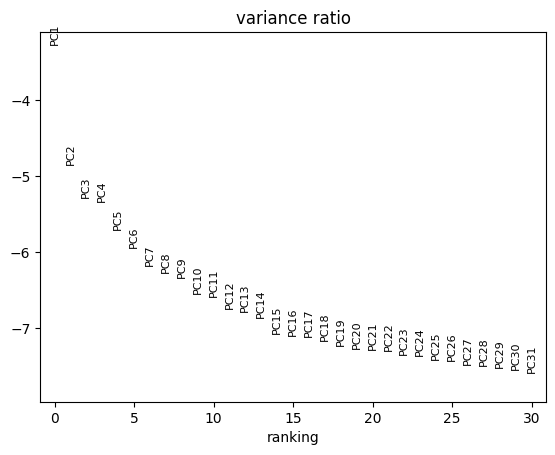

In [33]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_cyto, log=True)

In [34]:
adata_cyto

AnnData object with n_obs × n_vars = 272264 × 4999
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level'
    var: 'gene_ids', 'feature_types', 'genome', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
# Group the PCs into a single AnnData object
X_cyto_pca = adata_cyto.obsm["X_pca"][:, :20]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_cyto_pca /= np.sqrt(np.max(adata_cyto.uns["pca"]["variance"]))

# Check that obs_names align
assert np.array_equal(nuclei_obs_all['cell_id'].values, adata_cyto.obs['cell_id'].values), "Cell IDs do not match"

# Concatenate along columns (features) and keep only informative PCs
X_combined = np.concatenate([X_nuc_pca, X_cyto_pca], axis=1)

# Create a new AnnData to store these fused PCs
adata_combined = ad.AnnData(X=X_combined, obs=nuclei_obs_all.copy())

# Name the columns
adata_combined.var_names = [f"PC_nuc_{i}" for i in range(len(X_nuc_pca[0]))] + [f"PC_cyto_{i}" for i in range(len(X_cyto_pca[0]))]

In [36]:
# Check var of first PC for each table is 1
print(np.var(adata_cyto.obsm["X_pca"][:, 0]))

0.9999963


In [37]:
# Have a look to all the PCs var in the combined data
print("Cyto:")
for i in range(20):
    print(f"PC {i} variance: {np.var(adata_cyto.obsm['X_pca'][:, i])}")

Cyto:
PC 0 variance: 0.9999963045120239
PC 1 variance: 0.20618419349193573
PC 2 variance: 0.13345928490161896
PC 3 variance: 0.1256713718175888
PC 4 variance: 0.08692029863595963
PC 5 variance: 0.06938796490430832
PC 6 variance: 0.0543423667550087
PC 7 variance: 0.04994048550724983
PC 8 variance: 0.04649205878376961
PC 9 variance: 0.03755370154976845
PC 10 variance: 0.03621901199221611
PC 11 variance: 0.03108692169189453
PC 12 variance: 0.02986019104719162
PC 13 variance: 0.027399659156799316
PC 14 variance: 0.022149518132209778
PC 15 variance: 0.02166561968624592
PC 16 variance: 0.02148265577852726
PC 17 variance: 0.02035752683877945
PC 18 variance: 0.01900065876543522
PC 19 variance: 0.01840691640973091


In [38]:
# Clean memory
del adata_cyto
gc.collect()

0

In [39]:
# Add final labels coming from table nuclei and table cells

adata_combined.obs['transcript_cat'] = adata_combined.obs['cell_id'].map(cellid2transcript_cat).fillna('Unknown')

adata_combined.obs['final_label_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')
adata_combined.obs['final_label_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')

adata_combined.obs['label1_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel1).fillna('Unknown')
adata_combined.obs['label1_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel1).fillna('Unknown')

adata_combined.obs

,region,slide,cell_id,area,ct_tangram,transcript_counts,transcript_cat,final_label_nuclei,final_label_cells,label1_nuclei,label1_cells
aaaaaaaa-1,nucleus_boundaries,morpho,aaaaaaaa-1,19.574901,Club cell,131,3,T_NK,T_NK,T,T
aaaaaaab-1,nucleus_boundaries,morpho,aaaaaaab-1,8.737764,Neuroendocrine cell,41,1,Unknown,T_NK,Unknown,T
aaaaaaac-1,nucleus_boundaries,morpho,aaaaaaac-1,24.090059,CD16 NK cell,210,3,T_NK,T_NK,T,T
aaaaaaad-1,nucleus_boundaries,morpho,aaaaaaad-1,19.079021,Memory CD4 T cell,183,4,T_NK,T_NK,T,T
aaaaaaae-1,nucleus_boundaries,morpho,aaaaaaae-1,25.423266,CD16 NK cell,244,4,T_NK,T_NK,T,T
...,...,...,...,...,...,...,...,...,...,...,...
aaaeddab-1,nucleus_boundaries,morpho,aaaeddab-1,3.883578,CD16 monocyte,5,1,Less10,Myeloid,less10,Mast
aaaeddac-1,nucleus_boundaries,morpho,aaaeddac-1,38.586490,Goblet cell,81,0,Unknown,Unknown,Unknown,Unknown
aaaeddad-1,nucleus_boundaries,morpho,aaaeddad-1,24.609702,Neuroendocrine cell,9,0,Less10,Unknown,less10,Unknown
aaaeddae-1,nucleus_boundaries,morpho,aaaeddae-1,25.874608,Red blood cell,75,0,Epithelial,Unknown,Epithelial,Unknown


In [40]:
adata_combined

AnnData object with n_obs × n_vars = 272264 × 41
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'

In [41]:
adata_combined.var

""
PC_nuc_0
PC_nuc_1
PC_nuc_2
PC_nuc_3
PC_nuc_4
PC_nuc_5
PC_nuc_6
PC_nuc_7
PC_nuc_8
PC_nuc_9


## 4. PCA on the two separated PCA (late fusion) + Clustering

In [42]:
# Run a "second PCA" on the scaled features
# No scaling because we already scaled using the maximum eigenvalue for each table
sc.tl.pca(adata_combined)

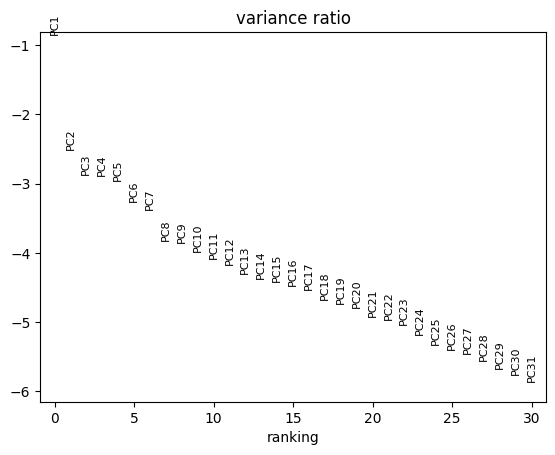

In [43]:
sc.pl.pca_variance_ratio(adata_combined, log=True)

In [44]:
adata_combined

AnnData object with n_obs × n_vars = 272264 × 41
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [45]:
# Neighborhood graph of cells using the PCA representation of the data matrix
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=31, use_rep="X_pca", key_added='pca_n10_pcs31')
# Embedding the neighborhood graph using UMAP
sc.tl.umap(adata_combined, neighbors_key='pca_n10_pcs31')
# Leiden clustering directly clusters the neighborhood graph of cells
sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs31_leiden_res0.4', neighbors_key='pca_n10_pcs31')
sc.tl.leiden(adata_combined, resolution=0.6, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs31_leiden_res0.6', neighbors_key='pca_n10_pcs31')
sc.tl.leiden(adata_combined, resolution=0.8, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs31_leiden_res0.8', neighbors_key='pca_n10_pcs31')

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_42906/2104451648.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs31_leiden_res0.4', neighbors_key='pca_n10_pcs31')


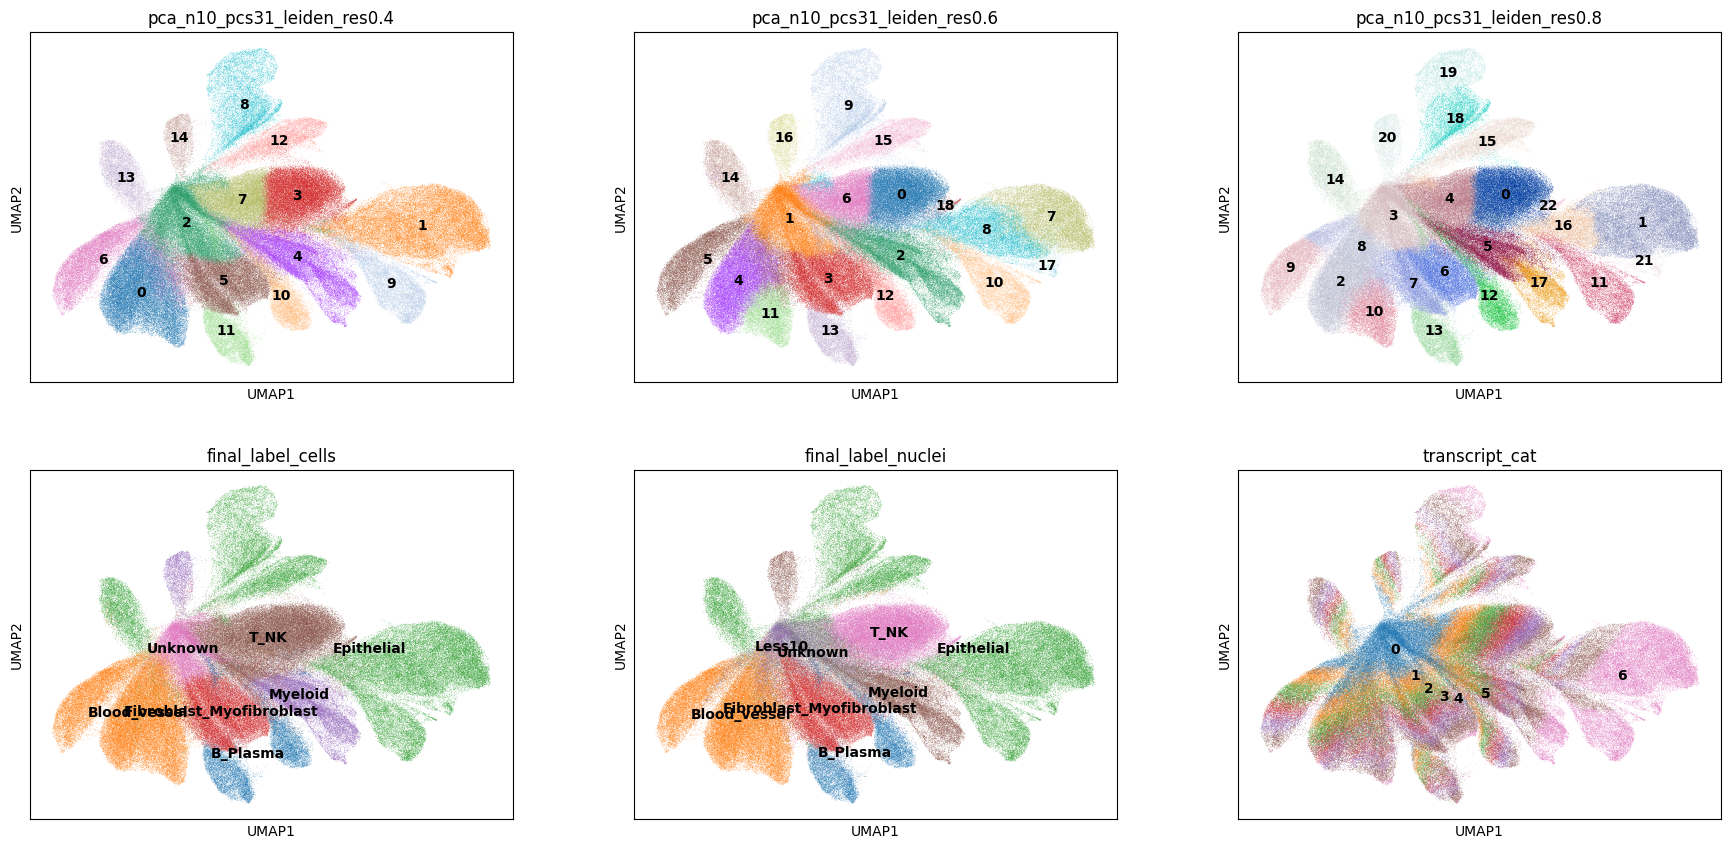

In [46]:
# Plot the clusters
adata_combined.obs['transcript_cat'] = pd.Categorical(adata_combined.obs['transcript_cat'])
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs31',
           color=['pca_n10_pcs31_leiden_res0.4', 'pca_n10_pcs31_leiden_res0.6', 'pca_n10_pcs31_leiden_res0.8', 'final_label_cells', 'final_label_nuclei', 'transcript_cat'],
           ncols=3, legend_loc='on data')

In [47]:
clustering_label = 'pca_n10_pcs31_leiden_res0.6'

In [48]:
adata_cells = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

In [49]:
# Put the clustering_label into the adata_cells to be able to use marker genes, and also final_label_cells and final_label_nuclei
cellid2clustering_label = dict(adata_combined.obs[['cell_id', clustering_label]].values)
adata_cells.obs["cluster_combined"] = adata_cells.obs['cell_id'].map(cellid2clustering_label).fillna('Unknown')
adata_cells.obs["final_label_cells"] = adata_cells.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')
adata_cells.obs["final_label_nuclei"] = adata_cells.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')


# Preprocess the adata_cells
sc.pp.normalize_total(adata_cells, target_sum=1e4)
sc.pp.log1p(adata_cells)

# Add X_umap to adata_cells, checking before cell_id alignment
assert np.array_equal(adata_cells.obs['cell_id'].values, adata_combined.obs['cell_id'].values), "Cell IDs do not match"
adata_cells.obsm['X_umap'] = adata_combined.obsm['X_umap']

# Wilcoxon rank-sum (Mann-Whitney-U) test. 
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.
sc.tl.rank_genes_groups(adata_cells, "cluster_combined", method="wilcoxon", corr_method="benjamini-hochberg", key_added="rank_genes_"+"cluster_combined")
# The top ranked genes per cluster
top_ranked_genes = pd.DataFrame(adata_cells.uns["rank_genes_"+"cluster_combined"]["names"]).iloc[:7, :]
list_genes = pd.concat([top_ranked_genes[col] for col in top_ranked_genes], ignore_index=True).tolist()

## 5. Analyze and get combined labels

### Helper functions

In [50]:
def analyze_clusters(adata, resolution_key):
    
    # Ensure the resolution key exists in obs
    if resolution_key not in adata.obs:
        raise ValueError(f"{resolution_key} not found in adata.obs.")
    
    # Group data by the specified clustering resolution
    cluster_groups = adata.obs.groupby(resolution_key)

    results = {}

    for cluster_id, group in cluster_groups:
        
        # Calculate dominant labels for final_label_cells
        label_cells_counts = group['final_label_cells'].value_counts(normalize=True)
        dominant_cells = label_cells_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for cells
        label1_cells_counts = group['label1_cells'].value_counts(normalize=True)
        top1_cells = label1_cells_counts.head(1) * 100

        # Calculate dominant labels for final_label_nuclei
        label_nuclei_counts = group['final_label_nuclei'].value_counts(normalize=True)
        dominant_nuclei = label_nuclei_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for nuclei
        label1_nuclei_counts = group['label1_nuclei'].value_counts(normalize=True)
        top1_nuclei = label1_nuclei_counts.head(1) * 100
        if top1_nuclei.keys()[0] == 'less_10_rna':
            top1_nuclei = label1_nuclei_counts.head(2).tail(1) * 100
        
        # Align categories for comparison
        common_categories = group['final_label_cells'].cat.categories.union(group['final_label_nuclei'].cat.categories)
        group['final_label_cells'] = group['final_label_cells'].cat.set_categories(common_categories)
        group['final_label_nuclei'] = group['final_label_nuclei'].cat.set_categories(common_categories)

        # Count different labels between final_label_cells and final_label_nuclei
        total_cells = len(group)  # Total number of cells in the cluster
        differing_labels_count_woUnknown = ((group['final_label_cells'] != group['final_label_nuclei']) & (group['final_label_nuclei'] != 'Unknown')  & (group['final_label_nuclei'] != 'Less10')).sum() / total_cells * 100
        differing_labels_count = (group['final_label_cells'] != group['final_label_nuclei']).sum() / total_cells * 100

        # Store the results
        results[cluster_id] = (dominant_cells.to_dict(), dominant_nuclei.to_dict(), top1_cells.to_dict(), top1_nuclei.to_dict(), differing_labels_count_woUnknown, differing_labels_count)

    return results

In [51]:
def analyze_cluster_dominance(cluster_analysis_results):
    
    clusters_unknown_cells = []
    clusters_different_top1 = []
    clusters_high_diff = []

    for cluster_id, (dominant_cells, dominant_nuclei, label1_cells, label1_nuclei, diff_percentage_woUnknown, _) in cluster_analysis_results.items():
        
        # Check if top 1 dominant_cells is 'Unknown' or 'Less10'
        
        top1_dominant_cells = max(dominant_cells, key=dominant_cells.get)
        if top1_dominant_cells == 'Unknown' or top1_dominant_cells == 'Less10':
            clusters_unknown_cells.append(cluster_id)
        
        # Check if top 1 for dominant_cells is different from dominant_nuclei
        
        top1_dominant_nuclei = max(dominant_nuclei, key=dominant_nuclei.get)

        if top1_dominant_nuclei == 'Unknown' or top1_dominant_nuclei == 'Less10':
            sorted_nuclei = sorted(dominant_nuclei.items(), key=lambda x: x[1], reverse=True)
            if len(sorted_nuclei) > 1:  # Make sure there's a second element
                top1_dominant_nuclei = sorted_nuclei[1][0]

        if top1_dominant_cells != top1_dominant_nuclei:
            clusters_different_top1.append(cluster_id)
        
        # Check if diff_percentage_woUnknown is greater than 40%
        
        if diff_percentage_woUnknown > 40:
            clusters_high_diff.append(cluster_id)

    print(f"Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': {clusters_unknown_cells}")
    print(f"Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): {clusters_different_top1}")
    print(f"Clusters where diff_percentage_woUnknown is greater than 40%: {clusters_high_diff}")

    print("=" * 50)

    clusters_to_analyse = set(clusters_unknown_cells + clusters_different_top1 + clusters_high_diff)
    for cluster_id in clusters_to_analyse:
        print(f"\nCluster ID: {cluster_id}")
        print(f"Dominant final_label_cells: {cluster_analysis_results[cluster_id][0]} - with dominant label1: {cluster_analysis_results[cluster_id][2]}")
        print(f"Dominant final_label_nuclei: {cluster_analysis_results[cluster_id][1]} - with dominant label1: {cluster_analysis_results[cluster_id][3]}")
        print(f"Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: {round(cluster_analysis_results[cluster_id][4], 2)} %")
        print(f"Count of differing labels: {round(cluster_analysis_results[cluster_id][5], 2)} %")
        print(f"% of cells in cluster: {round(len(adata_combined.obs[adata_combined.obs[clustering_label] == cluster_id]) / len(adata_combined.obs) * 100, 2)} %")
        print("-----")

In [52]:
def assign_final_labels(cluster_analysis_results, input_dict):
    
    dict_combined_labels = {}

    for cluster_id, (dominant_cells, _, _, _, _, _) in cluster_analysis_results.items():
        
        if cluster_id in input_dict:
            # Use the label from input_dict if cluster_id is in it
            dict_combined_labels[cluster_id] = input_dict[cluster_id]
        else:
            # Otherwise, use the dominant label from final_label_cells
            dict_combined_labels[cluster_id] = max(dominant_cells, key=dominant_cells.get)

    return dict_combined_labels

### Analysis

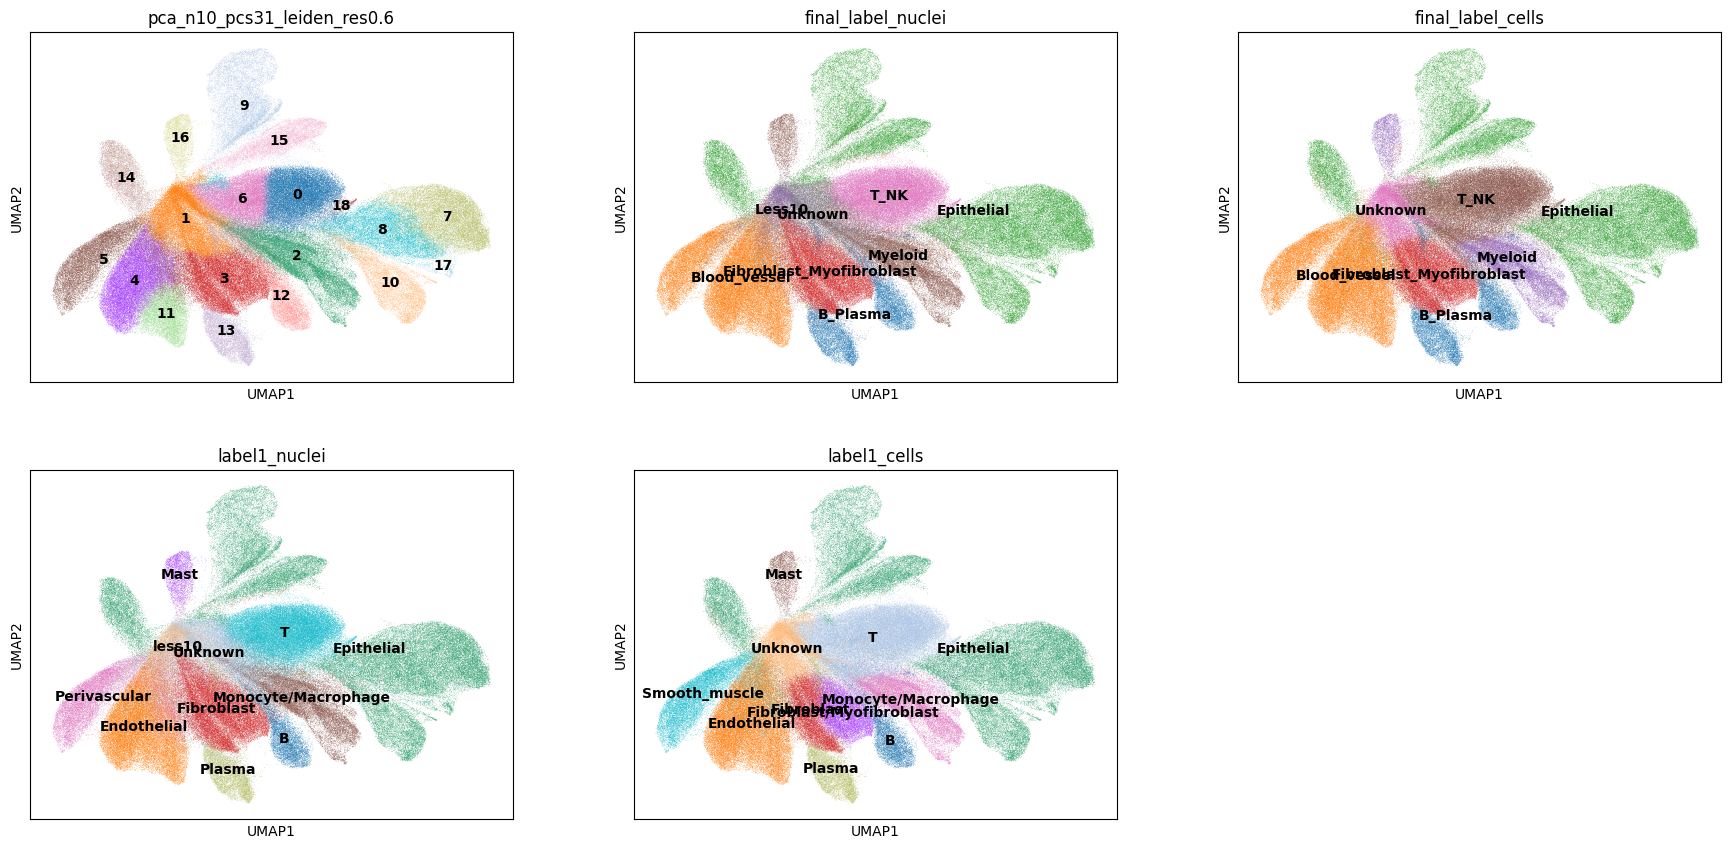

In [53]:
# Plot the clusters
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs31',
           color=[clustering_label, 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'],
           ncols=3, legend_loc='on data')

In [54]:
cluster_analysis_results = analyze_clusters(adata_combined, clustering_label)

for cluster_id, (dominant_cells, dominant_nuclei, _, _, diff_count_woUnknown, diff_count) in cluster_analysis_results.items():
    print("=" * 50)
    print(f"Cluster ID: {cluster_id}")
    print(f"Dominant final_label_cells: {dominant_cells}")
    print(f"Dominant final_label_nuclei: {dominant_nuclei}")
    print(f"Count of differing labels without 'Unknown/Less10' label for Nuclei: {round(diff_count_woUnknown, 2)} %")
    print(f"Count of differing labels: {round(diff_count, 2)} %\n")

Cluster ID: 0
Dominant final_label_cells: {'T_NK': 97.1990400802321, 'Fibroblast_Myofibroblast': 0.7844120491421613}
Dominant final_label_nuclei: {'T_NK': 97.48200150435189, 'Myeloid': 0.8990293348615638}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 3.88 %
Count of differing labels: 4.25 %

Cluster ID: 1
Dominant final_label_cells: {'Unknown': 61.7816091954023, 'Fibroblast_Myofibroblast': 14.662835249042145}
Dominant final_label_nuclei: {'Unknown': 36.02298850574713, 'Fibroblast_Myofibroblast': 24.835249042145595}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 23.02 %
Count of differing labels: 55.14 %

Cluster ID: 2
Dominant final_label_cells: {'Myeloid': 76.5898189695188, 'T_NK': 17.650471917066376}
Dominant final_label_nuclei: {'Myeloid': 80.65140027850843, 'Unknown': 12.88101500850998}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 14.97 %
Count of differing labels: 27.76 %

Cluster ID: 3
Dominant final_label_cells

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_42906/1125182952.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_groups = adata.obs.groupby(resolution_key)


In [55]:
analyze_cluster_dominance(cluster_analysis_results)

Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': ['1']
Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): ['1']
Clusters where diff_percentage_woUnknown is greater than 40%: []

Cluster ID: 1
Dominant final_label_cells: {'Unknown': 61.7816091954023, 'Fibroblast_Myofibroblast': 14.662835249042145} - with dominant label1: {'Unknown': 61.7816091954023}
Dominant final_label_nuclei: {'Unknown': 36.02298850574713, 'Fibroblast_Myofibroblast': 24.835249042145595} - with dominant label1: {'Unknown': 36.02298850574713}
Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: 23.02 %
Count of differing labels: 55.14 %
% of cells in cluster: 9.59 %
-----


In [56]:
dict_combined_labels = assign_final_labels(cluster_analysis_results, {'1': 'Unknown'})
dict_combined_labels

{'0': 'T_NK',
 '1': 'Unknown',
 '2': 'Myeloid',
 '3': 'Fibroblast_Myofibroblast',
 '4': 'Blood_vessel',
 '5': 'Blood_vessel',
 '6': 'T_NK',
 '7': 'Epithelial',
 '8': 'Epithelial',
 '9': 'Epithelial',
 '10': 'Epithelial',
 '11': 'Blood_vessel',
 '12': 'B_Plasma',
 '13': 'B_Plasma',
 '14': 'Epithelial',
 '15': 'Epithelial',
 '16': 'Myeloid',
 '17': 'Epithelial',
 '18': 'T_NK'}

In [57]:
adata_combined.obs['final_label_combined'] = adata_combined.obs[clustering_label].map(dict_combined_labels)
adata_combined.obs

,region,slide,cell_id,area,ct_tangram,transcript_counts,transcript_cat,final_label_nuclei,final_label_cells,label1_nuclei,label1_cells,pca_n10_pcs31_leiden_res0.4,pca_n10_pcs31_leiden_res0.6,pca_n10_pcs31_leiden_res0.8,final_label_combined
aaaaaaaa-1,nucleus_boundaries,morpho,aaaaaaaa-1,19.574901,Club cell,131,3,T_NK,T_NK,T,T,3,0,0,T_NK
aaaaaaab-1,nucleus_boundaries,morpho,aaaaaaab-1,8.737764,Neuroendocrine cell,41,1,Unknown,T_NK,Unknown,T,7,6,4,T_NK
aaaaaaac-1,nucleus_boundaries,morpho,aaaaaaac-1,24.090059,CD16 NK cell,210,3,T_NK,T_NK,T,T,3,0,0,T_NK
aaaaaaad-1,nucleus_boundaries,morpho,aaaaaaad-1,19.079021,Memory CD4 T cell,183,4,T_NK,T_NK,T,T,3,0,0,T_NK
aaaaaaae-1,nucleus_boundaries,morpho,aaaaaaae-1,25.423266,CD16 NK cell,244,4,T_NK,T_NK,T,T,3,0,0,T_NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aaaeddab-1,nucleus_boundaries,morpho,aaaeddab-1,3.883578,CD16 monocyte,5,1,Less10,Myeloid,less10,Mast,2,1,3,Unknown
aaaeddac-1,nucleus_boundaries,morpho,aaaeddac-1,38.586490,Goblet cell,81,0,Unknown,Unknown,Unknown,Unknown,2,1,3,Unknown
aaaeddad-1,nucleus_boundaries,morpho,aaaeddad-1,24.609702,Neuroendocrine cell,9,0,Less10,Unknown,less10,Unknown,2,1,3,Unknown
aaaeddae-1,nucleus_boundaries,morpho,aaaeddae-1,25.874608,Red blood cell,75,0,Epithelial,Unknown,Epithelial,Unknown,2,1,3,Unknown


In [58]:
adata_combined.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  70565
Blood_vessel                54933
T_NK                        47879
Myeloid                     29514
Unknown                     26100
Fibroblast_Myofibroblast    25011
B_Plasma                    18262
Name: count, dtype: int64

In [59]:
# Create final table, adding cell_id with less than 10 transcripts

adata_nuclei_ini = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")

adata_combined_missing = adata_nuclei_ini[~adata_nuclei_ini.obs_names.isin(adata_combined.obs_names)].copy()
adata_combined_missing.obs['final_label_combined'] = 'Less10'
adata_combined_missing.obs['final_label_nuclei'] = 'Less10'
adata_combined_missing.obs['final_label_cells'] = 'Less10'
print(adata_combined.shape[0] + adata_combined_missing.shape[0])

adata_combined_all = ad.concat([adata_combined, adata_combined_missing], join="outer", merge="first", uns_merge="first", pairwise=True)
print(adata_combined_all.shape[0])

275207
275207


In [60]:
# Clean memory
del adata_combined, adata_combined_missing, adata_nuclei_ini
gc.collect()

59281

In [61]:
adata_combined_all

AnnData object with n_obs × n_vars = 275207 × 8625
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs31_leiden_res0.4', 'pca_n10_pcs31_leiden_res0.6', 'pca_n10_pcs31_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs31', 'umap', 'pca_n10_pcs31_leiden_res0.4', 'pca_n10_pcs31_leiden_res0.6', 'pca_n10_pcs31_leiden_res0.8', 'pca_n10_pcs31_leiden_res0.4_colors', 'pca_n10_pcs31_leiden_res0.6_colors', 'pca_n10_pcs31_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs31_distances', 'pca_n10_pcs31_connectivities'

In [62]:
adata_combined_all.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  70565
Blood_vessel                54933
T_NK                        47879
Myeloid                     29514
Unknown                     26100
Fibroblast_Myofibroblast    25011
B_Plasma                    18262
Less10                       2943
Name: count, dtype: int64

In [63]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('shapes',))

In [64]:
# Add in sdata final
sdata_final.tables['table_combined'] = adata_combined_all

In [65]:
adata_combined_all

AnnData object with n_obs × n_vars = 275207 × 8625
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs31_leiden_res0.4', 'pca_n10_pcs31_leiden_res0.6', 'pca_n10_pcs31_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs31', 'umap', 'pca_n10_pcs31_leiden_res0.4', 'pca_n10_pcs31_leiden_res0.6', 'pca_n10_pcs31_leiden_res0.8', 'pca_n10_pcs31_leiden_res0.4_colors', 'pca_n10_pcs31_leiden_res0.6_colors', 'pca_n10_pcs31_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs31_distances', 'pca_n10_pcs31_connectivities'

In [66]:
# Convert in str the final_label_combined, final_label_cells and final_label_nuclei to see it in Napari
sdata_final.tables['table_combined'].obs['final_label_combined'] = sdata_final.tables['table_combined'].obs['final_label_combined'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_cells'] = sdata_final.tables['table_combined'].obs['final_label_cells'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_nuclei'] = sdata_final.tables['table_combined'].obs['final_label_nuclei'].astype(str)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


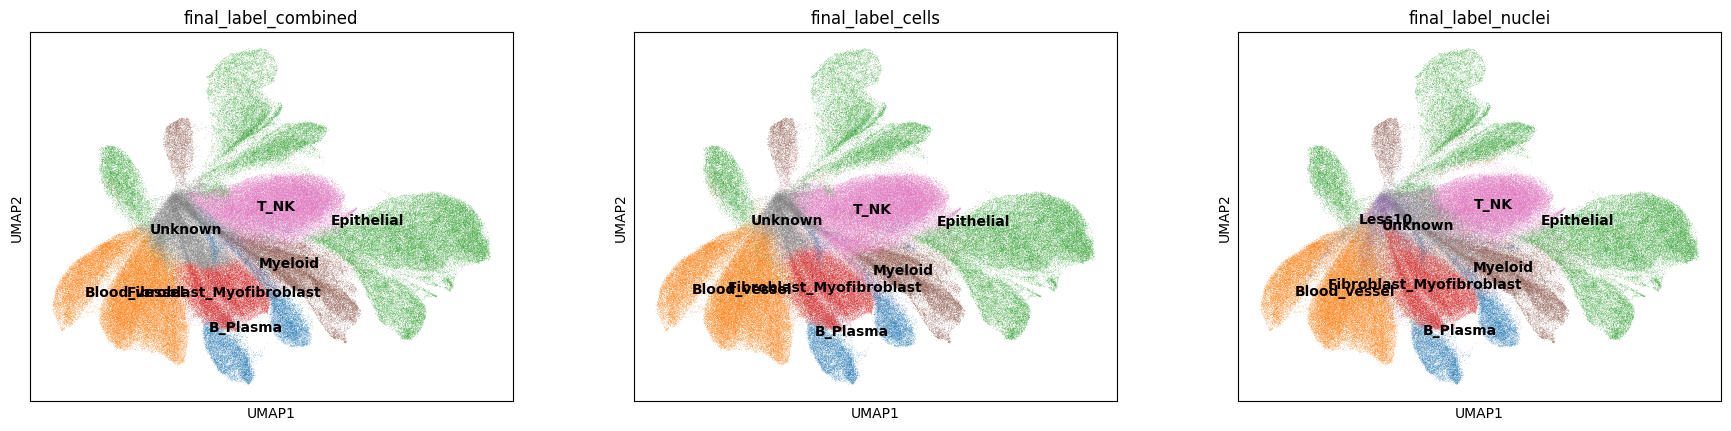

In [67]:
sc.pl.umap(sdata_final.tables['table_combined'], color=['final_label_combined', 'final_label_cells', 'final_label_nuclei'], ncols=3, legend_loc='on data')

In [68]:
# Put table_combined as annotating cell_boundaries

sdata_final["table_combined"].obs["region"] = "cell_boundaries"
sdata_final.tables["table_combined"].obs['region'] = sdata_final.tables["table_combined"].obs['region'].astype('category')
sdata_final.set_table_annotates_spatialelement(table_name="table_combined", region="cell_boundaries", region_key="region", instance_key="cell_id")

region, region_key, instance_key = get_table_keys(sdata_final["table_combined"])
print(region, region_key, instance_key)

cell_boundaries region cell_id


In [69]:
# Color for final label in Napari

to_hex = partial(colors.to_hex, keep_alpha=True)

# Normalize the RGB values to the range [0, 1] by dividing by 255
napari_color = {
                "T_NK": to_hex(to_rgba([255/255, 15/255, 15/255])[:3]),                      # Red
                "B_Plasma": to_hex(to_rgba([255/255, 143/255, 15/255])[:3]),                 # Orange
                "Myeloid": to_hex(to_rgba([255/255, 211/255, 15/255])[:3]),                  # Yellow
                "Blood_vessel": to_hex(to_rgba([70/255, 128/255, 0/255])[:3]),               # Dark Green
                "Fibroblast_Myofibroblast": to_hex(to_rgba([156/255, 255/255, 36/255])[:3]), # Light Green
                "Epithelial": to_hex(to_rgba([57/255, 208/255, 133/255])[:3]),               # Blue Green
                "Specialized": to_hex(to_rgba([69/255, 237/255, 255/255])[:3]),              # Turquoise
                "Melanocyte": to_hex(to_rgba([22/255, 169/255, 223/255])[:3]),               # Blue
                "Stem_like": to_hex(to_rgba([22/255, 69/255, 223/255])[:3]),                 # Dark Blue
                "Glioblastoma": to_hex(to_rgba([130/255, 55/255, 235/255])[:3]),             # Purple
                "Unknown": to_hex(to_rgba([0/255, 0/255, 0/255])[:3]),                       # Black
                "Less10": to_hex(to_rgba([143/255, 143/255, 143/255])[:3])                   # Grey
                }

sdata_final.tables['table_combined'].uns["final_label_combined_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_cells_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_nuclei_colors"] = napari_color

In [70]:
sdata_final.write_element("table_combined")